In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlpb
%matplotlib inline
import seaborn as sns
sns.set()
import csv
import math
import warnings
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.reset_index()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [ ]:
data.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2035.0,1.497137e+02,4.866451e+01,81.10,120.025,141.50,157.175,327.70
High,2035.0,1.519928e+02,4.941311e+01,82.80,122.100,143.40,159.400,328.75
Low,2035.0,1.472939e+02,4.793196e+01,80.00,118.300,139.60,155.150,321.65
Last,2035.0,1.494743e+02,4.873257e+01,81.00,120.075,141.10,156.925,325.95
Close,2035.0,1.494503e+02,4.871204e+01,80.95,120.050,141.25,156.900,325.75
Total Trade Quantity,2035.0,2.335681e+06,2.091778e+06,39610.00,1146444.500,1783456.00,2813594.000,29191015.00
Turnover (Lacs),2035.0,3.899981e+03,4.570768e+03,37.04,1427.460,2512.03,4539.015,55755.08


In [ ]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
print('The dataset has {} rows and {} columns'.format(data.shape[0],data.shape[1]))
print('\n')

The dataset has 2035 rows and 8 columns




In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [ ]:
data.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


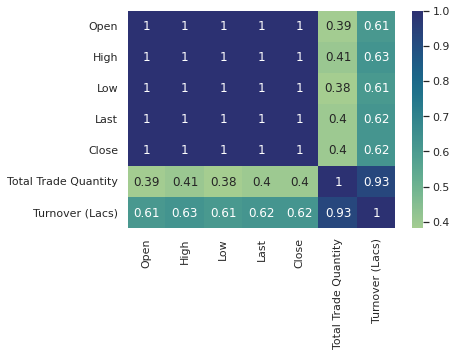

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap="crest")

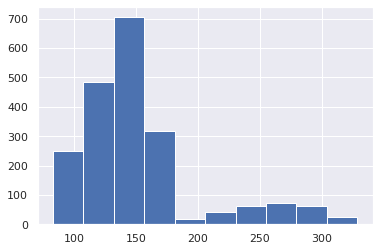

In [ ]:
data['High'].hist()

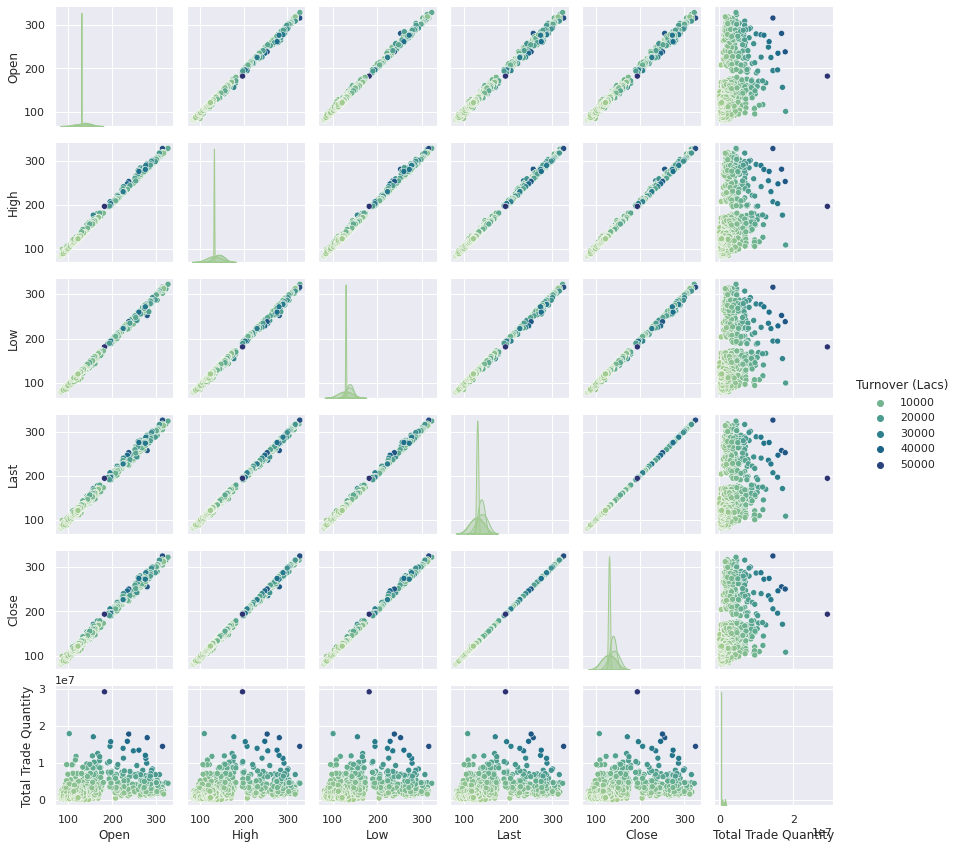

In [ ]:
sns.pairplot(data,hue="Turnover (Lacs)",palette="crest",height=2)
mlpb.show()

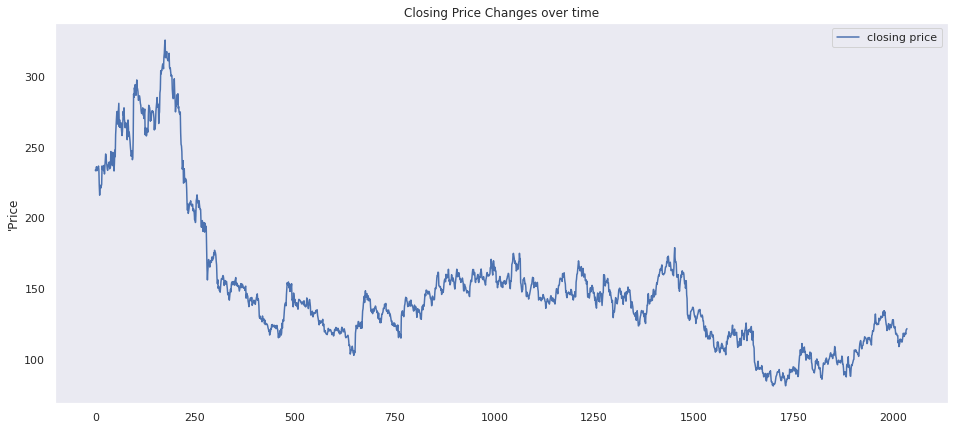

In [ ]:
mlpb.figure(figsize=(10,6))
data['Close'].plot(kind='line',figsize=(16,7),c='b',label='closing price')

mlpb.ylabel("'Price")
mlpb.legend(loc="upper right")
mlpb.title("Closing Price Changes over time")
mlpb.grid()

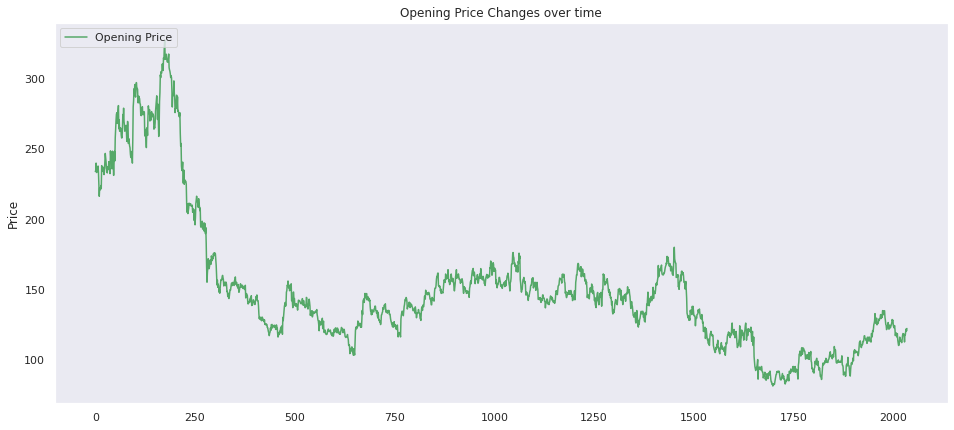

In [ ]:
mlpb.figure(figsize=(10,6))
data["Open"].plot(kind='line',figsize=(16,7),c='g',label="Opening Price")

mlpb.ylabel("Price")
mlpb.legend(loc="upper left")
mlpb.title("Opening Price Changes over time")
mlpb.grid()

In [ ]:
df_close=data.reset_index()['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

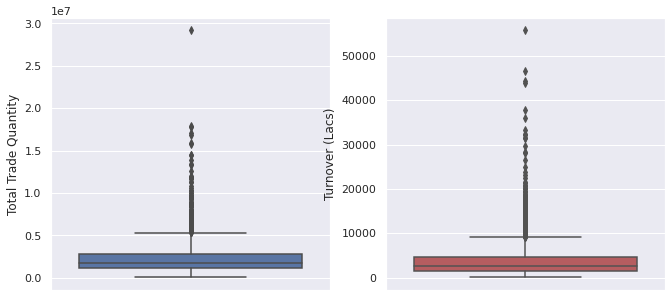

In [ ]:
mlpb.figure(figsize=(11,5))
mlpb.subplot(1,2,1)
sns.boxplot(data=data,y='Total Trade Quantity',color='b')
sns.set_style("darkgrid")
mlpb.subplot(1,2,2)
sns.boxplot(data=data,y='Turnover (Lacs)',color='r')
sns.set_style("darkgrid")

In [ ]:
training_set=data.reset_index()['Open']
training_set

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
training_set=scaler.fit_transform(np.array(df_close).reshape(-1,1))
training_set

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
train_size=int(len(training_set)*0.75)
test_size=int(len(training_set))-train_size
train_data,test_data=training_set[0:train_size,:],training_set[train_size:len(data),:1]
train_size

1526

In [ ]:
def create_dataset(dataset,time_step=1):
  datax=[]
  datay=[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    datax.append(a)
    datay.append(dataset[i+time_step,0])
  return np.array(datax),np.array(datay)

In [ ]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [ ]:
print(x_train.shape,y_train.shape)

(1425, 100) (1425,)


In [ ]:
print(x_test.shape,y_test.shape)

(408, 100) (408,)


In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_train.shape)
print(y_train.shape)

(1425, 100, 1)
(1425,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(408, 100, 1)
(408,)


In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam",metrics="acc")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 13s 210ms/step - loss: 0.0306 - acc: 7.0175e-04 - val_loss: 0.0020 - val_acc: 0.0025
Epoch 2/100
23/23 [==============================] - 3s 151ms/step - loss: 0.0027 - acc: 7.0175e-04 - val_loss: 0.0010 - val_acc: 0.0025
Epoch 3/100
23/23 [==============================] - 3s 142ms/step - loss: 0.0011 - acc: 7.0175e-04 - val_loss: 8.8578e-04 - val_acc: 0.0025
Epoch 4/100
23/23 [==============================] - 3s 143ms/step - loss: 0.0010 - acc: 7.0175e-04 - val_loss: 0.0011 - val_acc: 0.0025
Epoch 5/100
23/23 [==============================] - 3s 145ms/step - loss: 0.0010 - acc: 7.0175e-04 - val_loss: 9.6297e-04 - val_acc: 0.0025
Epoch 6/100
23/23 [==============================] - 3s 145ms/step - loss: 9.6966e-04 - acc: 7.0175e-04 - val_loss: 0.0010 - val_acc: 0.0025
Epoch 7/100
23/23 [==============================] - 3s 140ms/step - loss: 9.3603e-04 - acc: 7.0175e-04 - val_loss: 0.0012 - val_acc: 0.0025
Epoch 8/100
23/23 [=====

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

13/13 [==============================] - 0s 31ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_data)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

106.39429258870935

In [ ]:
look_back=100
trainPredictPlot=np.empty_like(training_set)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#testPredictPlot=np.empty_like(training_set)
#testPredictPlot[:,:]=np.nan
#estPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1:]=test_predict

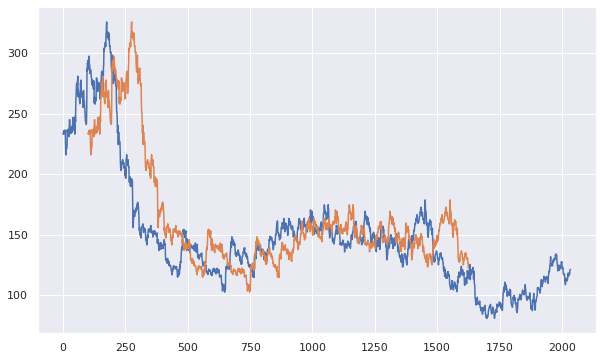

In [ ]:
mlpb.figure(figsize=(10,6))
mlpb.plot(scaler.inverse_transform(training_set))
mlpb.plot(trainPredictPlot)
#mlpb.plot(testPredictPlot)
mlpb.show()